In [6]:
# Importing Pandas for Dataframe Manipulation and Matplotlib for Data Visualization.
import pandas as pd
from matplotlib import pyplot as plt

# Importing the Label Encoder (for data pre-processing) and KMeans (for data clustering) from Sklearn.
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Reading in our Mall Customers data and printing out the first five rows to the console!
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Creating a new Label Encoder object.
encoder = LabelEncoder()

# Encoding our 'Gender' Column (0: Male, 1: Female).
df["Gender"] = encoder.fit_transform(df["Gender"]) # Male = 1, Female = 0.

# Viewing our newly-modified dataframe!
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


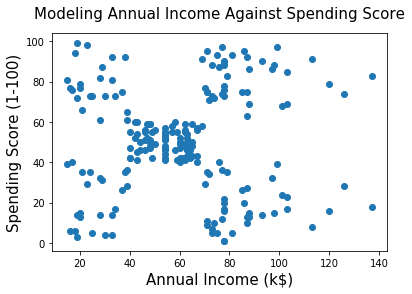

In [30]:
# Visualizing the relationship between Annual Income and Spending Score with a scatter plot.
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])

# Adding metadata (axis labels and title) to our visualization for increased readability.
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Spending Score (1-100)", fontsize=15)
plt.title("Modeling Annual Income Against Spending Score", fontsize=15, pad=15)

plt.show()

In [13]:
# Creating a testing list for the number of clusters, consisting of values between 1 and 15 inclusive.
n_clusters = range(1, 16)

# Declaring and initializing a new results list (to store mean squared error for each cluster value).
results = []

for n in n_clusters:
    # Assigning a new KMeans Classifier to the given number of clusters.
    classifier = KMeans(n_clusters=n)
    
    # Fitting our model to the annual income and spending score attribute columns.
    classifier.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    
    # Appending the SSE (sum of squared error) for each unique cluster value to our results list.
    results.append({
        'Number of Clusters': n,
        'Sum of Squared Errors': classifier.inertia_
    })

# Creating and visualizing a dataframe of all our results!
results_df = pd.DataFrame(results)
results_df

,Number of Clusters,Sum of Squared Errors
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37233.814511
6,7,30259.657207
7,8,25018.781613
8,9,21826.936303
9,10,19681.255828


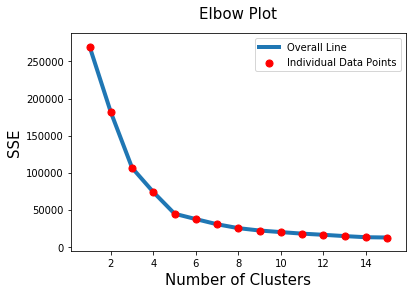

In [28]:
# Plotting an Elbow Plot of our numbers of clusters against the sum of squared error.
plt.plot(results_df["Number of Clusters"], results_df["Sum of Squared Errors"], linewidth=4, zorder=1)
plt.scatter(results_df["Number of Clusters"], results_df["Sum of Squared Errors"], color="red", s=50, zorder=2)

# Adding metadata (axis labels, title, and legend) to our plot for increased readability.
plt.xlabel("Number of Clusters", fontsize=15)
plt.ylabel("SSE", fontsize=15)
plt.title("Elbow Plot", fontsize=15, pad=15)
plt.legend(["Overall Line", "Individual Data Points"], loc="upper right")

plt.show()

In [31]:
# Choosing the optimum cluster value (5) to create our final K-Means model.
model = KMeans(n_clusters=5)

# Fitting our classifier to the annual income and spending score columns.
predictions = model.fit_predict(df[["Annual Income (k$)", "Spending Score (1-100)"]])
predictions

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [40]:
# Assigning a new column "Cluster" to our predictions list.
df["Cluster"] = predictions

# Visualizing our new dataframe.
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,3
2,3,0,20,16,6,0
3,4,0,23,16,77,3
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,2
197,198,1,32,126,74,1
198,199,1,32,137,18,2


In [42]:
# Checking the cluster centers (centroids) of our K-Means classifier.
model.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

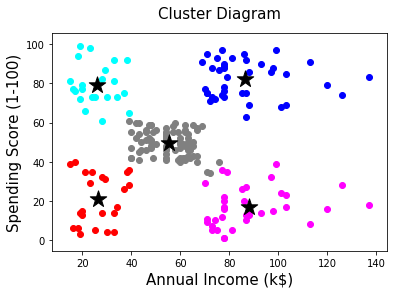

In [49]:
# Creating seperate variables representing the columns for each unique cluster (0, 1, 2, 3, and 4).
cluster_one = df[df.Cluster == 0]
cluster_two = df[df.Cluster == 1]
cluster_three = df[df.Cluster == 2]
cluster_four = df[df.Cluster == 3]
cluster_five = df[df.Cluster == 4]

# Plotting each cluster in a different color!
plt.scatter(cluster_one["Annual Income (k$)"], cluster_one["Spending Score (1-100)"], color="red")
plt.scatter(cluster_two["Annual Income (k$)"], cluster_two["Spending Score (1-100)"], color="blue")
plt.scatter(cluster_three["Annual Income (k$)"], cluster_three["Spending Score (1-100)"], color="magenta")
plt.scatter(cluster_four["Annual Income (k$)"], cluster_four["Spending Score (1-100)"], color="cyan")
plt.scatter(cluster_five["Annual Income (k$)"], cluster_five["Spending Score (1-100)"], color="gray")

# Plotting our cluster centers (centroids) as black stars.
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color="black", s=300, marker="*")

# Adding metadata (axis labels and title) to our plot for increased readability.
plt.xlabel("Annual Income (k$)", fontsize=15)
plt.ylabel("Spending Score (1-100)", fontsize=15)
plt.title("Cluster Diagram", fontsize=15, pad=15)

plt.show()